In [2]:
!pip install pylivecoinwatch 

In [3]:
from platform import python_version

print(python_version())

3.10.8


In [ ]:
!pip install --pre pycaret

In [6]:
from pycaret.regression import *
import matplotlib.pyplot as plt
import time
import pandas as pd
from pylivecoinwatch import LiveCoinWatchAPI
from datetime import datetime
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

ModuleNotFoundError: No module named 'pycaret'

<IPython.core.display.Javascript object>


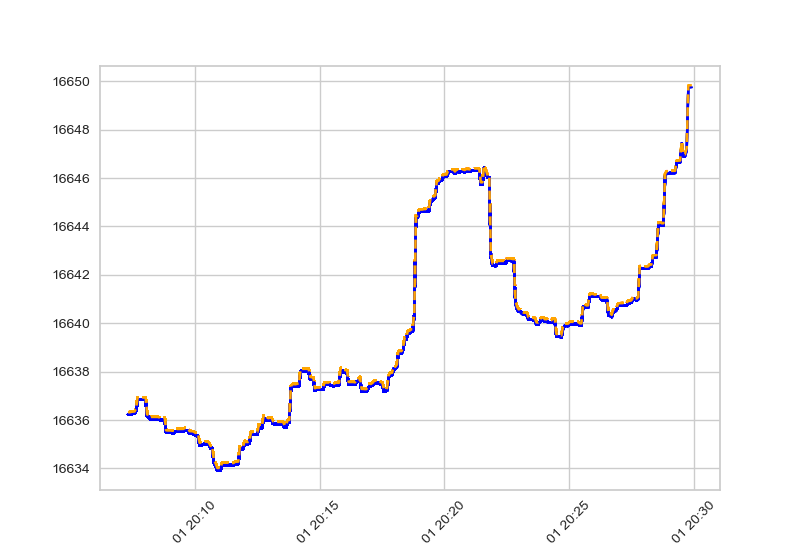

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xticks(rotation=45)
fig.show()

In [84]:
x_ax, y_ax, y_ax2 = [], [], []

In [85]:
# load model without .pkl extension
#local_path = '/Users/markuskofler/AI_ML/Project/bitcoin_lr' 
model = load_model('BTC_seconds_version_3')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['BTCUSDT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', LinearRegression(n_jobs=-1))])

In [86]:
key = "34fb0408-7a47-4c02-9420-d6317f6edb39"


df = pd.DataFrame(columns=['BTCUSDT'])

row_nr = len(df.index)+1

while True:
    try:
        json = LiveCoinWatchAPI(key)
        price = json.coins_single(code='BTC')['rate']
        price = float(price)
        now = datetime.now()
        x_ax.append(now)
        y_ax.append(price)
       
        row = pd.Series({'BTCUSDT':price}, name=now)
        df = df.append(row)
        df = predict_model(model, data=df)
        
        y_ax2.append(df['prediction_label'][-1])
        
        
        print(f'observation nr: {row_nr}\ttime: {now.time()}\tprice: ${price}\tprediction: {df["prediction_label"][-1]}')
        row_nr += 1

        ax.plot(x_ax, y_ax, color='blue')
        ax.plot(x_ax, y_ax2, color='orange', linestyle='dashed')
        fig.canvas.draw()
        
        time.sleep(3) # 3 seconds sleep results in an update of every 5 seconds since the request API takes 3 seconds
        
    except KeyboardInterrupt:
        print('execution has been manually halted!')
        break


observation nr: 158	time: 20:07:20.110577	price: $16636.23305012793	prediction: 16636.322265625
observation nr: 159	time: 20:07:24.237443	price: $16636.23305012793	prediction: 16636.322265625
observation nr: 160	time: 20:07:28.067306	price: $16636.24713909968	prediction: 16636.337890625
observation nr: 161	time: 20:07:31.817020	price: $16636.261883610227	prediction: 16636.3515625
observation nr: 162	time: 20:07:35.515955	price: $16636.261883610227	prediction: 16636.3515625
observation nr: 163	time: 20:07:39.233689	price: $16636.385108272727	prediction: 16636.474609375
observation nr: 164	time: 20:07:42.938356	price: $16636.85388873459	prediction: 16636.943359375
observation nr: 165	time: 20:07:46.718556	price: $16636.85388873459	prediction: 16636.943359375
observation nr: 166	time: 20:07:50.472233	price: $16636.84272879446	prediction: 16636.931640625
observation nr: 167	time: 20:07:54.588047	price: $16636.842311151377	prediction: 16636.931640625
observation nr: 168	time: 20:07:58.28731

observation nr: 244	time: 20:12:49.528967	price: $16636.011200614856	prediction: 16636.1015625
observation nr: 245	time: 20:12:53.328011	price: $16636.011200614856	prediction: 16636.1015625
observation nr: 246	time: 20:12:57.114523	price: $16635.983682786886	prediction: 16636.07421875
observation nr: 247	time: 20:13:00.927584	price: $16636.002866869094	prediction: 16636.091796875
observation nr: 248	time: 20:13:04.684315	price: $16636.002866869094	prediction: 16636.091796875
observation nr: 249	time: 20:13:08.549311	price: $16635.85357279157	prediction: 16635.943359375
observation nr: 250	time: 20:13:12.870084	price: $16635.833450766157	prediction: 16635.923828125
observation nr: 251	time: 20:13:16.750970	price: $16635.83295766101	prediction: 16635.921875
observation nr: 252	time: 20:13:20.572668	price: $16635.83295766101	prediction: 16635.921875
observation nr: 253	time: 20:13:24.480781	price: $16635.834620209214	prediction: 16635.923828125
observation nr: 254	time: 20:13:28.284277	pr

observation nr: 330	time: 20:18:21.088060	price: $16638.911449288196	prediction: 16639.001953125
observation nr: 331	time: 20:18:24.885084	price: $16639.326957094934	prediction: 16639.416015625
observation nr: 332	time: 20:18:28.682991	price: $16639.326957094934	prediction: 16639.416015625
observation nr: 333	time: 20:18:32.477265	price: $16639.59536467136	prediction: 16639.685546875
observation nr: 334	time: 20:18:36.263851	price: $16639.59536467136	prediction: 16639.685546875
observation nr: 335	time: 20:18:40.060914	price: $16639.661701859375	prediction: 16639.751953125
observation nr: 336	time: 20:18:44.089845	price: $16639.661701859375	prediction: 16639.751953125
observation nr: 337	time: 20:18:47.919906	price: $16640.381077251885	prediction: 16640.46875
observation nr: 338	time: 20:18:51.803551	price: $16644.362847322744	prediction: 16644.451171875
observation nr: 339	time: 20:18:55.644690	price: $16644.362847322744	prediction: 16644.451171875
observation nr: 340	time: 20:18:59.5

observation nr: 416	time: 20:23:57.512389	price: $16640.147265245996	prediction: 16640.234375
observation nr: 417	time: 20:24:01.724860	price: $16640.075226384404	prediction: 16640.1640625
observation nr: 418	time: 20:24:05.563251	price: $16640.091272020425	prediction: 16640.1796875
observation nr: 419	time: 20:24:09.550855	price: $16640.03471031581	prediction: 16640.123046875
observation nr: 420	time: 20:24:13.459641	price: $16640.03471031581	prediction: 16640.123046875
observation nr: 421	time: 20:24:17.446967	price: $16640.034710873395	prediction: 16640.123046875
observation nr: 422	time: 20:24:21.442985	price: $16640.11996441279	prediction: 16640.20703125
observation nr: 423	time: 20:24:25.367042	price: $16640.11996441279	prediction: 16640.20703125
observation nr: 424	time: 20:24:29.305129	price: $16639.461636068492	prediction: 16639.55078125
observation nr: 425	time: 20:24:33.279136	price: $16639.46159732401	prediction: 16639.55078125
observation nr: 426	time: 20:24:37.164161	pric

observation nr: 502	time: 20:29:42.530770	price: $16647.14834802936	prediction: 16647.234375
observation nr: 503	time: 20:29:46.481341	price: $16649.751060909242	prediction: 16649.8359375
observation nr: 504	time: 20:29:50.870919	price: $16649.753659249352	prediction: 16649.837890625
observation nr: 505	time: 20:29:54.858571	price: $16649.753659249352	prediction: 16649.837890625
execution has been manually halted!


In [89]:
#df = pd.DataFrame(columns=['BTCUSDT'])
#row = pd.Series({'BTCUSDT':price}, name=str(now))
#df=df.append(row)
#df = predict_model(model, data=df)
#df['prediction_label'][-1] 


,BTCUSDT,prediction_label
2023-01-01 11:24:48.122319,16570.449219,16570.566406
2023-01-01 11:24:51.955539,16571.330078,16571.447266
2023-01-01 11:24:55.640927,16571.419922,16571.537109
2023-01-01 11:24:59.357850,16571.419922,16571.537109
2023-01-01 11:25:03.191952,16571.419922,16571.537109
...,...,...
2023-01-01 20:29:38.477991,16646.892578,16646.978516
2023-01-01 20:29:42.530770,16647.148438,16647.234375
2023-01-01 20:29:46.481341,16649.751953,16649.835938
2023-01-01 20:29:50.870919,16649.753906,16649.837891


<IPython.core.display.Javascript object>


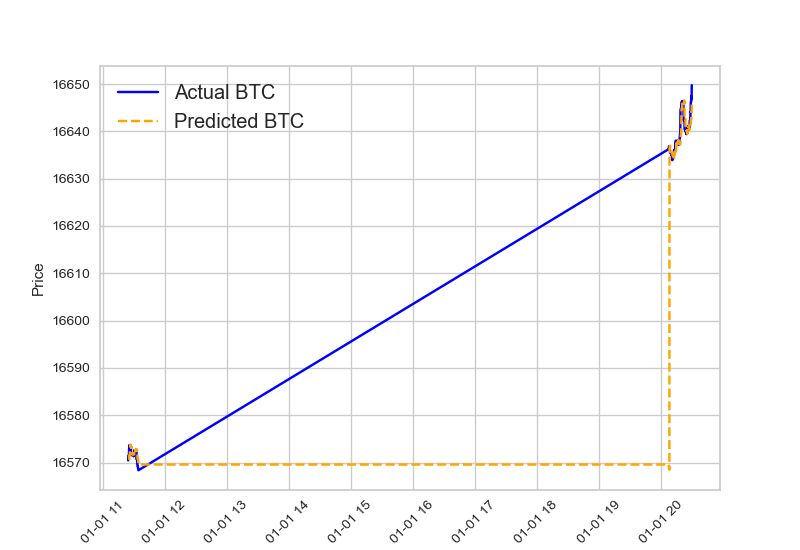

In [88]:
import matplotlib.pyplot as plt

time_frame = pd.to_datetime(df.index)
actual_price = df['BTCUSDT']
prediction = df['prediction_label'].shift(15)


# Set up the subplot
fig, ax = plt.subplots()#figsize=(22,10))

# Plot the data
ax.plot(time_frame, actual_price, label="Actual BTC", color='blue')
ax.plot(time_frame, prediction, label="Predicted BTC", color='orange', linestyle='dashed')


# Add a legend
ax.legend(frameon=False, loc='upper left', ncol=1, shadow=True, fontsize='large')

# Set the x-axis label
ax.set_xlabel("Time")

# rotate x-tick labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Set the y-axis label
ax.set_ylabel("Price")

# Show the plot
plt.show()

#plt.savefig('Bitcoin3.png')